In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# set style
plt.rcParams.update({
  # Figure
  'figure.figsize': [10, 6],
  'figure.titlesize': 16,
  'figure.titleweight': 'bold',
  'figure.facecolor': '#FFF',
  'figure.dpi': 200,

  # Font
  'font.sans-serif': ['Arial', 'DejaVu Sans', 'Helvetica', 'sans-serif'],
  'font.size': 12,

  # Axes
  'axes.facecolor': '#FFF',
  'axes.edgecolor':'#343a40',
  'axes.linewidth': 1.0,
  'axes.grid': True,
  'axes.axisbelow': True,
  'axes.titleweight': 'bold',
  'axes.titlesize': 14,
  'axes.labelsize': 12,
  'axes.spines.top': False,
  'axes.spines.right': False,

  # Grid
  'grid.color': '#E0E0E0',
  'grid.alpha': 0.7,
  'grid.linewidth': 0.6,

  # Tick
  'xtick.labelsize': 11,
  'ytick.labelsize': 11,

  # Legend
  'legend.fontsize': 11,
  'legend.edgecolor': '#343a40',

  # Lines
  'lines.linewidth': 2.0,

  # Export
  'savefig.dpi': 300, # High quality cho printing
  'savefig.bbox': 'tight', # Clean margins khi save
})

print("✅ Config applied!")

✅ Config applied!


In [3]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df['FastingBS'].unique()

array([0, 1])

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.duplicated().sum()

np.int64(0)

### Data cleaning

In [4]:
print(len(df[df['RestingBP'] == 0]))
print(len(df[df['Cholesterol'] == 0]))

1
172


In [4]:
df_clean = df.copy()
df_clean = df_clean[df_clean['RestingBP'] != 0]
healthy_mask = df_clean['HeartDisease'] == 0
chol_healthy = df_clean.loc[healthy_mask, 'Cholesterol']
chol_disease = df_clean.loc[~healthy_mask, 'Cholesterol']

df_clean.loc[healthy_mask, 'Cholesterol'] = chol_healthy.replace(to_replace=0, value=chol_healthy.median())

df_clean.loc[~healthy_mask, 'Cholesterol'] = chol_disease.replace(to_replace=0, value=chol_disease.median())

In [6]:
df_clean[['RestingBP', 'Cholesterol']].describe()

,RestingBP,Cholesterol
count,917.000000,917.000000
mean,132.540894,239.700109
std,17.999749,54.352727
min,80.000000,85.000000
25%,120.000000,214.000000
50%,130.000000,225.000000
75%,140.000000,267.000000
max,200.000000,603.000000


In [5]:
# Category -> Num
df_clean = pd.get_dummies(df_clean, drop_first=True)
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [30]:
X, y = df_clean.drop(columns='HeartDisease'), df_clean['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (733, 15)
y_train shape: (733,)
X_test shape: (184, 15)
y_test shape: (184,)


In [31]:
len(y_test[y_test == 1]) # Có tổng cộng 100 bệnh nhân mắc bệnh trong mẫu

110

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
forest_acc = forest.score(X_test, y_test)
forest_pred = forest.predict(X_test)
forest_rc = recall_score(y_test, forest_pred)

### Logistic Regression

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
log_acc = log.score(X_test_scaled, y_test)
log_pred = log.predict(X_test_scaled)
log_rc = recall_score(y_test, log_pred)

### Kết quả

In [37]:
print('Accuracy')
# print('*' * 50)
print(f'\tForest: {forest_acc:.2%}')
print(f'\tLogistic Regression: {log_acc:.2%}')

print('*' * 50)

print('Recall')
print(f'\tForest: {forest_rc:.2%}')
print(f'\tLogistic Regression: {log_rc:.2%}')

Accuracy
	Forest: 89.67%
	Logistic Regression: 88.04%
**************************************************
Recall
	Forest: 93.64%
	Logistic Regression: 90.00%


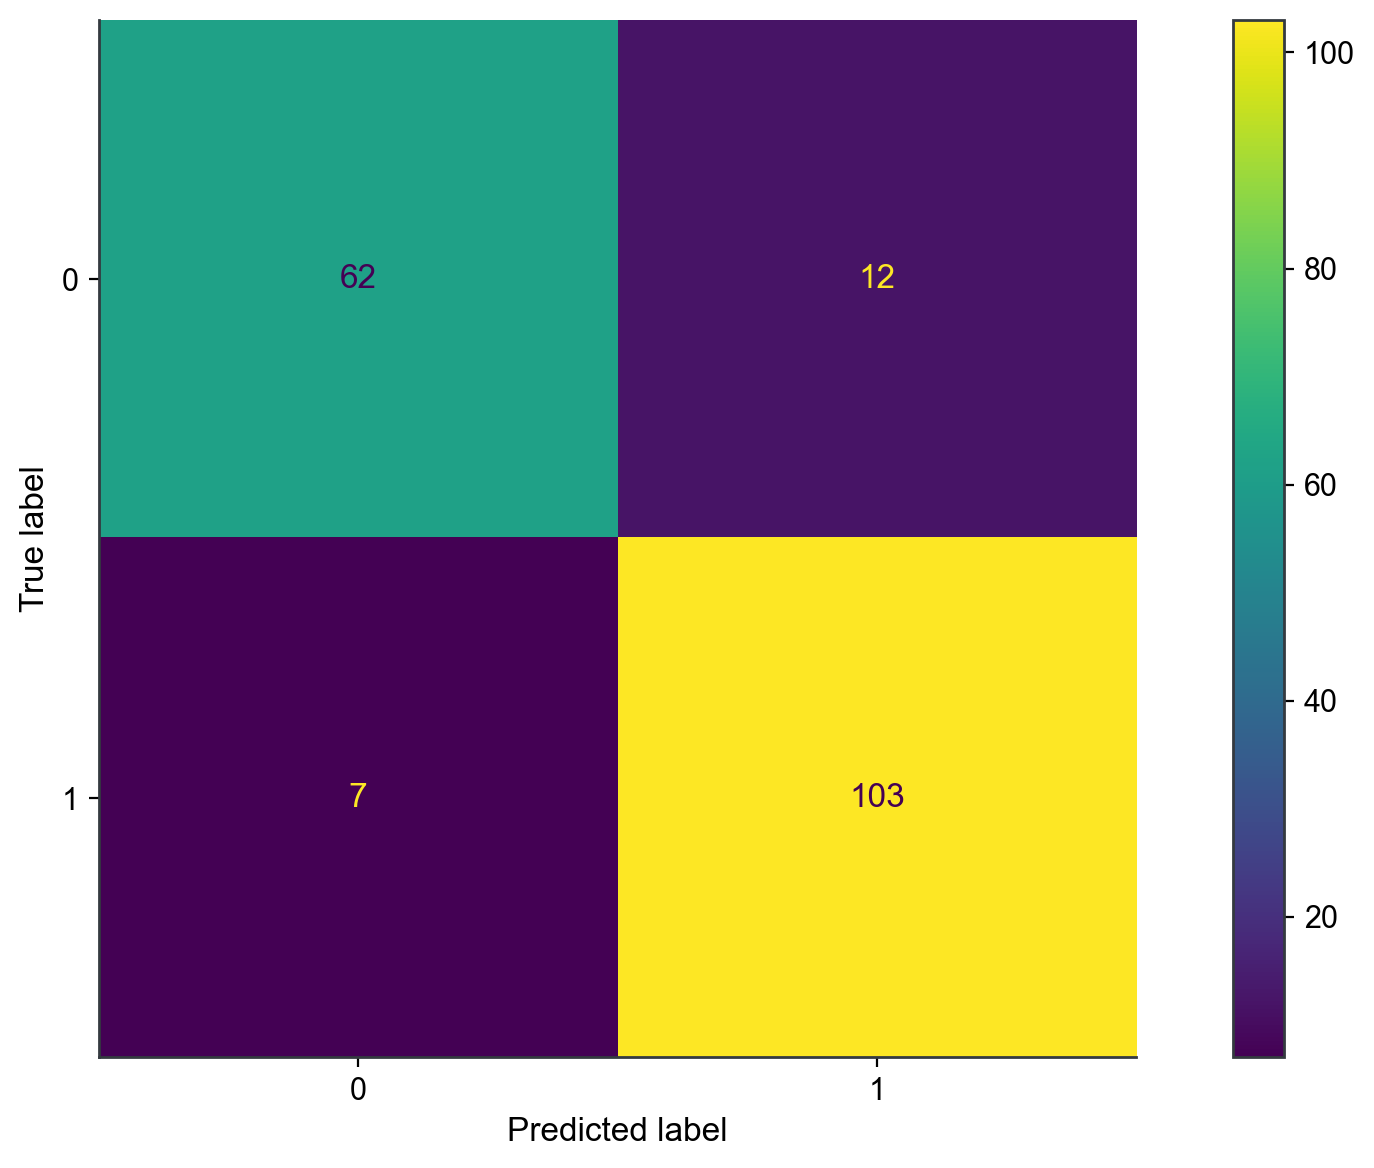

In [38]:
forest_cfmt = confusion_matrix(y_test, forest_pred)
ConfusionMatrixDisplay(forest_cfmt).plot()
plt.grid(False)
plt.tight_layout()
plt.show()

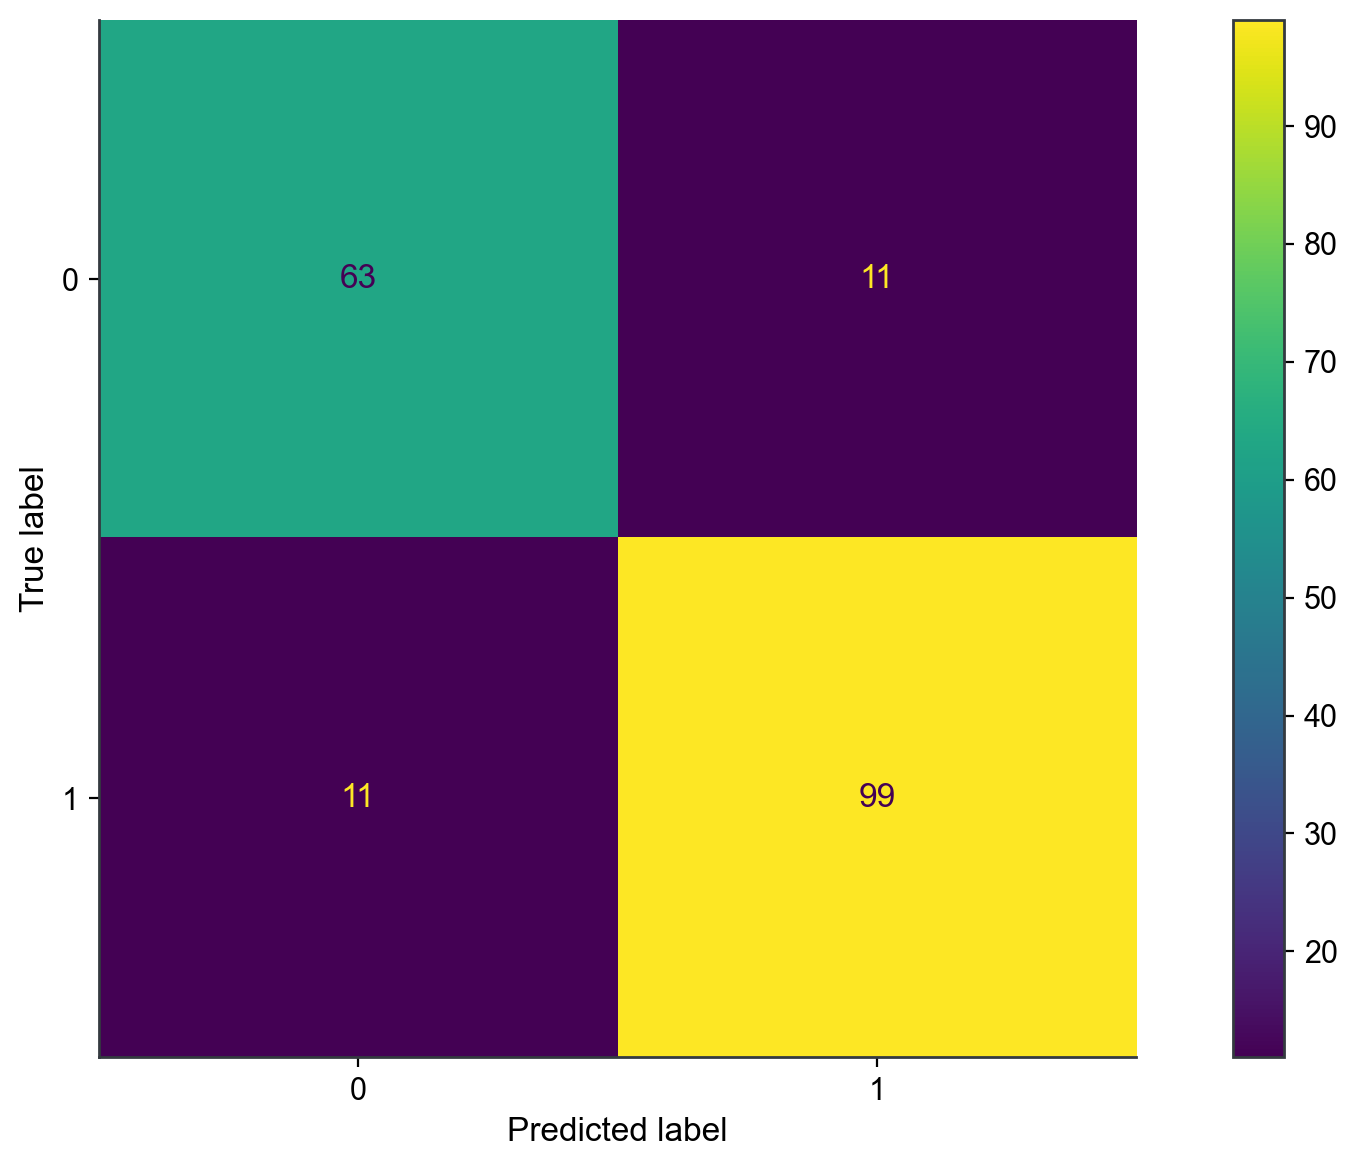

In [39]:
log_cfmt = confusion_matrix(y_test, log_pred)
ConfusionMatrixDisplay(log_cfmt).plot()
plt.grid(False)
plt.tight_layout()
plt.show()

### Tối ưu siêu tham số

In [40]:
param_grid = {
  'n_estimators': [100, 150, 200],
  'max_depth': [None, 5, 10, 15],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'max_features': ['sqrt', 'log2', None]
}

forest = RandomForestClassifier(n_jobs=-1)
forest_grid = GridSearchCV(forest, param_grid, cv=5, n_jobs=-1)
forest_grid.fit(X_train, y_train) # time: 1m55s

,estimator,RandomForestC...ier(n_jobs=-1)
,param_grid,"{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [41]:
forest_grid.best_estimator_

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
forest_grid_acc = forest_grid.best_estimator_.score(X_test, y_test)
forest_pred_cv = forest_grid.best_estimator_.predict(X_test)
forest_grid_rc = recall_score(y_test, forest_pred_cv)
print(f'Forest accuracy: {forest_grid_acc:.2%}')
print(f'Forest recall: {forest_grid_rc:.2%}')

Forest accuracy: 90.76%
Forest recall: 93.64%


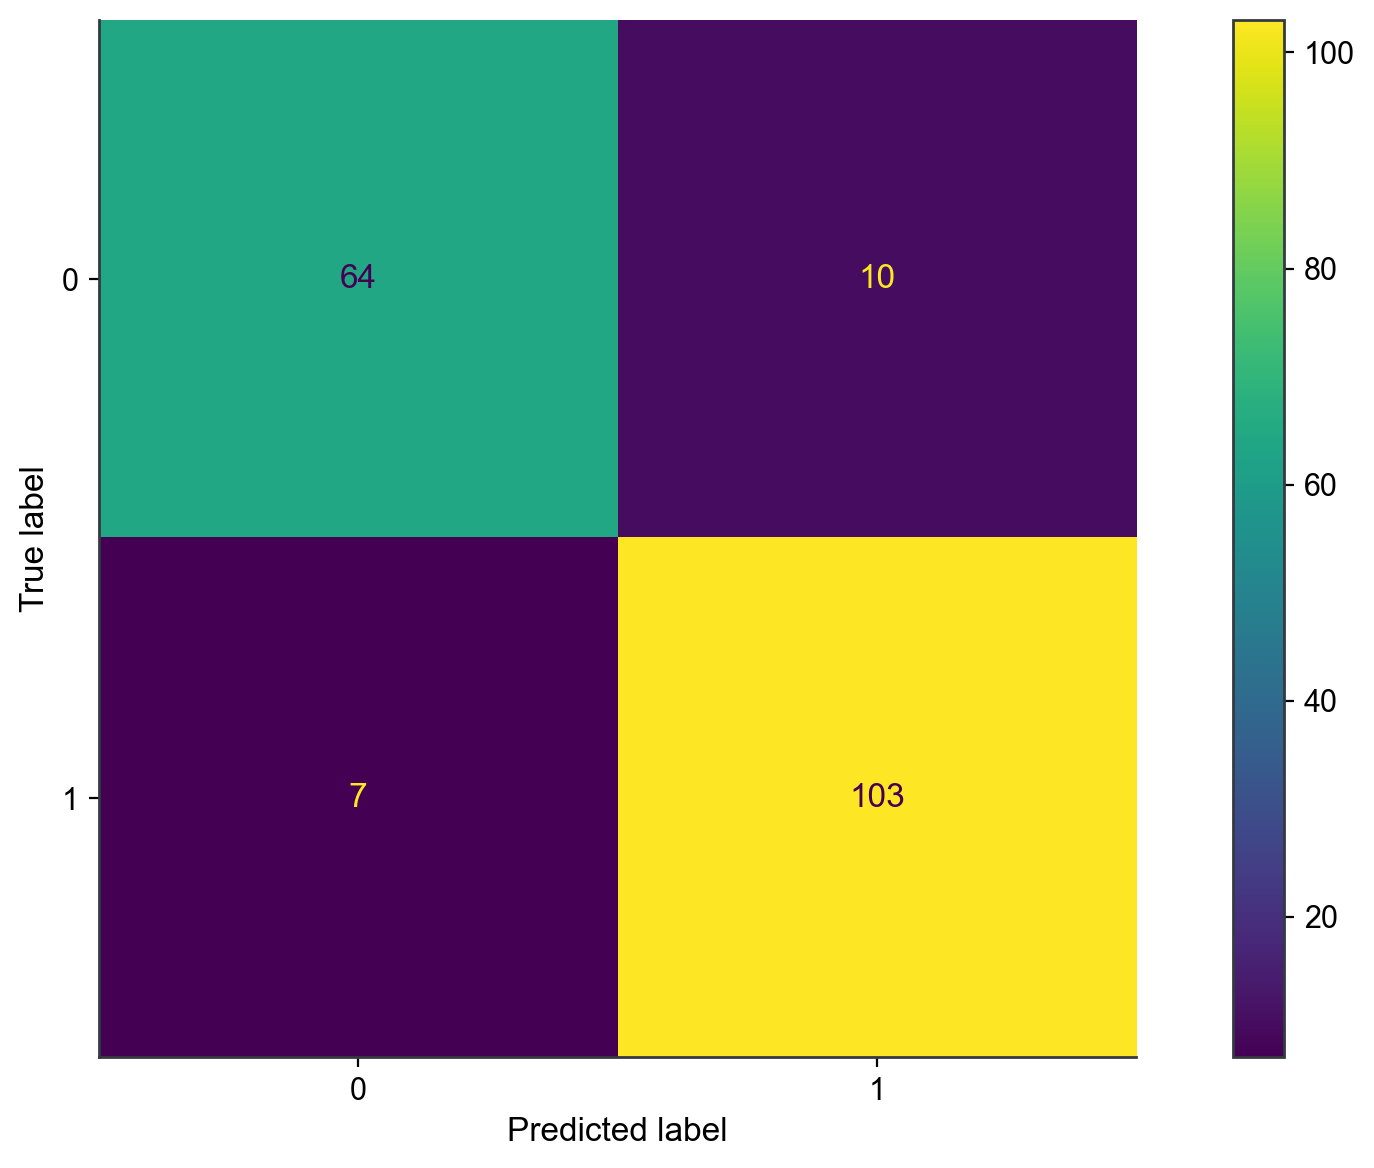

In [43]:
cf = confusion_matrix(y_test, forest_pred_cv)
ConfusionMatrixDisplay(cf).plot()
plt.grid(False)
plt.tight_layout()
plt.show()